In [1]:
# OPERATIONAL PACKAGES ---------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import inf
import scipy as sp

# STYLE RESOURCES ---------------------------------------
plt.style.reload_library()
plt.style.use(['science', 'grid'])

# FITTING PACKAGES ---------------------------------------
from lmfit import Model, Parameters
import scipy.optimize as optimization

In [150]:
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD ---------------------------------------
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

# FUNCTION FOR PLOTTING A SCATTER PLOT ---------------------------------------
def ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label):
    
    # SCATTER PLOT
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure1.png")
    
# FUNCTION FOR PLOTTING A SCATTER LOG PLOT ---------------------------------------
def ScatterLogPlot(xdata,ydata,error_x,error_y,color,x_label,y_label):
    
    # SCATTER PLOT
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig("Figures/figure1.png")

# MANUAL EQ 10: JHONSON NOISE VARIANCE
NoiseVariance = lambda param : (param[3]*10)/(param[0]*param[1]*param[2])**2 # G1,G2,GF,VDMM

# DEFINING NYQUIST FUNCTION
Nyquist = lambda R, k, T, f :4*k*R*T*f

# DEFINING A LINEAR FUNCTION
linear = lambda x, a, b : a*x + b

# DEFINING A POWER LAW FUNCTION FOR FIT
powerlaw = lambda x, a, b : a*x**b

def FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, color, x_label, y_label, function):
    
    # Plotting scatter plot first
    ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label)
    
    # Finding best fit value
    optimal = optimization.curve_fit(function, xdata, ydata, np.array([0.0, 0.0]), error_y)
    a, b = optimal[0][0], optimal[0][1]
    
    # Fitting data using LMFIT
    gModel = Model(function)
    gModel.set_param_hint('a', value=a, min=0, max=inf)
    gModel.set_param_hint('b', value=b, min=0, max=inf)
    params = gModel.make_params()
    result = gModel.fit(ydata, x=xdata, a=a, b=b, weights=1/error_y)
    
    # Plotting Fitted Function
    a, b = result.params['a'].value, result.params['b'].value
    da, db = result.params['a'].stderr, result.params['b'].stderr
    label = r'$\textit{Y = ' + str("{:.5}".format(a)) + 'X + ' + str("{:.2}".format(b)) + '}$'
    #plt.plot(xdata,result.best_fit, color=color)
    x = np.arange(xdata.min(), xdata.max(), (xdata.max()-xdata.min())/1000) 
    #plt.loglog(x, function(x, a ,b), color=color, label=label)
    plt.plot(x, function(x, a ,b), color=color, label=label)
    
    #VERTICAL LINE 
    plt.legend(prop={'size': 12}, loc=2)
    plt.savefig("Figures/figure.png")
    plt.show()
    
    # CALCULATING THE P-VALUE
    print('Corresponding p-value:',1.000-sp.stats.chi2.cdf(result.chisqr,result.nfree))
    print('Degrees of freedom:',result.nfree)

    return result    

def FUNCTION_FIT_powerlaw(xdata, ydata, error_x, error_y, color, x_label, y_label, function):
    
    # Plotting scatter plot first
    ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label)
    
    # Finding best fit value
    optimal = optimization.curve_fit(function, xdata, ydata, np.array([0.0, 0.0]), error_y)
    a, b = optimal[0][0], optimal[0][1]
    
    # Fitting data using LMFIT
    gModel = Model(function)
    gModel.set_param_hint('a', value=a, min=0, max=inf)
    gModel.set_param_hint('b', value=b, min=0, max=inf)
    params = gModel.make_params()
    result = gModel.fit(ydata, x=xdata, a=a, b=b, weights=1/error_y)
    
    # Plotting Fitted Function
    a, b = result.params['a'].value, result.params['b'].value
    da, db = result.params['a'].stderr, result.params['b'].stderr
    label = r'$\textit{Y = ' + str("{:.5}".format(a)) + 'X(' + str("{:.2}".format(b)) + ')}$'
    #plt.plot(xdata,result.best_fit, color=color)
    x = np.arange(xdata.min(), xdata.max(), (xdata.max()-xdata.min())/1000) 
    plt.loglog(x, function(x, a ,b), color=color, label=label)
    #plt.plot(x, function(x, a ,b), color=color, label=label)
    
    #VERTICAL LINE 
    plt.legend(prop={'size': 12}, loc=2)
    plt.savefig("Figures/figure.png")
    plt.show()
    
    # CALCULATING THE P-VALUE
    print('Corresponding p-value:',1.000-sp.stats.chi2.cdf(result.chisqr,result.nfree))
    print('Degrees of freedom:',result.nfree)

    return result   

# DEFINING A FUNCTION THAT RETURNS THE WEIGHTED AVERAGE WITH UNCERTAINTY
def weighted_avgs(values, deltas):
    weights = np.array(list(map(lambda x : 1/x**2, deltas)))
    best_val = np.dot(np.array(values), weights)/weights.sum()
    uncert = 1/np.sqrt(weights.sum())
    return [best_val, uncert]

In [159]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1M3q4vDcs5wu9C4umDq8SBvYUmYqljXlFabl7yYq-CUE'
workSheetName = 'Sheet1'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :4]

df['Noise Variance (nV)^2'] = NoiseVariance([600,df['G2'],1,df['$V_{DMM}$ Voltage (V)']])*10**(18)
df['NV_Uncert (nV)^2'] = df.apply(lambda x: uncertainty_var([600,x['G2'],1,x['$V_{DMM}$ Voltage (V)']], [0,0,0,x['$V_{DMM}$ Uncertainty (V)']], NoiseVariance), axis=1)*10**(18)
df

,Resistance ($\Omega$),G2,$V_{DMM}$ Voltage (V),$V_{DMM}$ Uncertainty (V),Noise Variance (nV)^2,NV_Uncert (nV)^2
0,1,2000,0.9590,0.0010,6.659722e+06,6944.444444
1,1,1500,0.5400,0.0005,6.666667e+06,6172.839506
2,1,1000,0.2380,0.0005,6.611111e+06,13888.888889
3,1,500,0.0572,0.0005,6.355556e+06,55555.555556
4,10,2000,0.9660,0.0010,6.708333e+06,6944.444444
5,10,1500,0.5420,0.0005,6.691358e+06,6172.839506
6,10,1000,0.2390,0.0005,6.638889e+06,13888.888889
7,10,500,0.0574,0.0005,6.377778e+06,55555.555556
8,100,2000,0.9890,0.0010,6.868056e+06,6944.444444
9,100,1500,0.5564,0.0005,6.869136e+06,6172.839506


---
### First try: using all the datapoints
---

In [160]:
# GROUPING BY RESISTANCE ---------------------------------------
# Taking the average using weighted averages
resistances = [1,10,100,1000,10000,100000]
data_final = []
for resistance in resistances:
    df_temporal = df[df['Resistance  ($\Omega$)']==resistance]
    avg = weighted_avgs(df_temporal['Noise Variance (nV)^2'], df_temporal['NV_Uncert (nV)^2'])
    data_final.append([avg[0], avg[1], resistance])
df2 = pd.DataFrame(data_final, columns=['Noise Variance (nV)^2', 'NV_Uncert (nV)^2', 'Resistance  ($\Omega$)'])
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$)
0,6.656516e+06,4364.856674,1
1,6.690947e+06,4364.856674,10
2,6.862140e+06,4364.856674,100
3,8.528437e+06,9086.783276,1000
4,2.550319e+07,15386.576251,10000
5,1.521523e+08,135340.426982,100000


In [1]:
# PLOTTING OUR DATA ---------------------------------------
xdata, ydata, error_x, error_y = df2['Resistance  ($\Omega$)'], df2['Noise Variance (nV)^2'], 0, df2['NV_Uncert (nV)^2']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', '$R_{in}$  ($\Omega$)', '$<V_J^2 + V_N^2>  (nV)^2$', linear)
result

NameError: name 'df2' is not defined

In [162]:
# Finding y-intercept <V_N^2 (t)> ---------------------------------------
y_intercept = result.params['b'].value
y_intercept_uncert = result.params['b'].stderr
y_intercept, y_intercept_uncert

(6743966.465337124, 253071.53285982652)

In [163]:
# Calculating Johnson Noise
df2['Johnson Noise (nV)^2'] = df2['Noise Variance (nV)^2'] - y_intercept
df2['Uncert Johnson Noise (nV)^2'] = np.sqrt(df2['NV_Uncert (nV)^2']**2 + y_intercept_uncert**2)
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$),Johnson Noise (nV)^2,Uncert Johnson Noise (nV)^2
0,6.656516e+06,4364.856674,1,-8.745069e+04,253109.171540
1,6.690947e+06,4364.856674,10,-5.301996e+04,253109.171540
2,6.862140e+06,4364.856674,100,1.181735e+05,253109.171540
3,8.528437e+06,9086.783276,1000,1.784470e+06,253234.615277
4,2.550319e+07,15386.576251,10000,1.875922e+07,253538.848054
5,1.521523e+08,135340.426982,100000,1.454084e+08,286988.208677


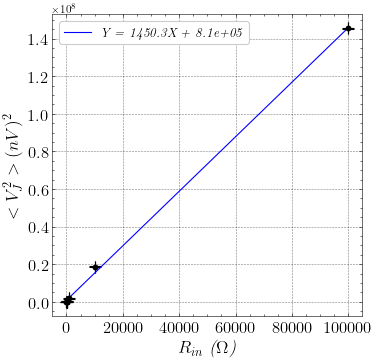

Corresponding p-value: 0.0
Degrees of freedom: 4


In [164]:
#### PLOTTING OUR DATA ---------------------------------------
xdata, ydata, error_x, error_y = df2['Resistance  ($\Omega$)'], df2['Johnson Noise (nV)^2'], 0, df2['Uncert Johnson Noise (nV)^2']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', '$R_{in}$  ($\Omega$)', '$<V_J^2>  (nV)^2$', linear)
result

In [165]:
# Finding the Boltzmann constant
from scipy.constants import k
T, ENBW = 294.5, 99.9e3
slope = result.params['a'].value*1e-18
slope_error = result.params['a'].stderr*1e-18
kb = slope/(4*T*ENBW)
kb_uncert = uncertainty_var([slope, T, ENBW], [slope_error, 0, 0], boltzmann)

print(slope, slope_error)
print(kb, kb_uncert)

1.4503070157951764e-15 2.358325708263135e-17
1.2323928476822972e-23 8.0159130548651685e-25


In [166]:
# DETERMING THE %ERROR
error = abs((kb-k)/k)*100
print("Percentage error: ", error, "%")
exp_precision = 100*slope_error/slope
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Percentage error:  10.738149400586451 %
Experimental precision: 1.626087223311203 %
Sigmas: 6.603673681612446


---
### Second try: dropping highest resistance datapoint
---

In [142]:
# GROUPING BY RESISTANCE ---------------------------------------
# Taking the average using weighted averages
resistances = [1,10,100,1000,10000,100000]
data_final = []
for resistance in resistances:
    df_temporal = df[df['Resistance  ($\Omega$)']==resistance]
    avg = weighted_avgs(df_temporal['Noise Variance (nV)^2'], df_temporal['NV_Uncert (nV)^2'])
    data_final.append([avg[0], avg[1], resistance])
df2 = pd.DataFrame(data_final, columns=['Noise Variance (nV)^2', 'NV_Uncert (nV)^2', 'Resistance  ($\Omega$)'])
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$)
0,6.656516e+06,4364.856674,1
1,6.690947e+06,4364.856674,10
2,6.862140e+06,4364.856674,100
3,8.528437e+06,9086.783276,1000
4,2.550319e+07,15386.576251,10000
5,1.521523e+08,135340.426982,100000


In [143]:
# Dropping higuest resistance:
df2.drop(df2.tail(1).index,inplace=True)
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$)
0,6.656516e+06,4364.856674,1
1,6.690947e+06,4364.856674,10
2,6.862140e+06,4364.856674,100
3,8.528437e+06,9086.783276,1000
4,2.550319e+07,15386.576251,10000


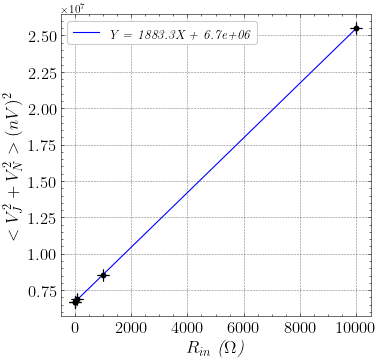

Corresponding p-value: 0.0006328719533776894
Degrees of freedom: 3


In [153]:
# PLOTTING OUR DATA ---------------------------------------
xdata, ydata, error_x, error_y = df2['Resistance  ($\Omega$)'], df2['Noise Variance (nV)^2'], 0, df2['NV_Uncert (nV)^2']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', '$R_{in}$  ($\Omega$)', '$<V_J^2 + V_N^2>  (nV)^2$', linear)
result

In [154]:
# Finding y-intercept <V_N^2 (t)> ---------------------------------------
y_intercept = result.params['b'].value
y_intercept_uncert = result.params['b'].stderr
y_intercept, y_intercept_uncert

(6665417.523387111, 5891.884915659035)

In [155]:
# Calculating Johnson Noise
df2['Johnson Noise (nV)^2'] = df2['Noise Variance (nV)^2'] - y_intercept
df2['Uncert Johnson Noise (nV)^2'] = np.sqrt(df2['NV_Uncert (nV)^2']**2 + y_intercept_uncert**2)
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$),Johnson Noise (nV)^2,Uncert Johnson Noise (nV)^2
0,6.656516e+06,4364.856674,1,-8.901748e+03,7332.549464
1,6.690947e+06,4364.856674,10,2.552898e+04,7332.549464
2,6.862140e+06,4364.856674,100,1.967224e+05,7332.549464
3,8.528437e+06,9086.783276,1000,1.863019e+06,10829.770919
4,2.550319e+07,15386.576251,10000,1.883777e+07,16476.074672


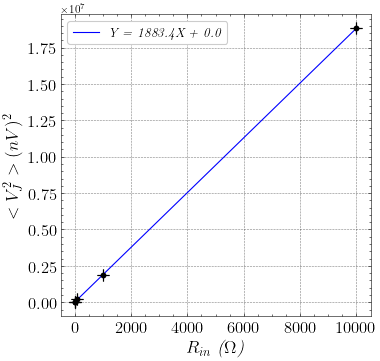

Corresponding p-value: 0.04818618183909196
Degrees of freedom: 3


In [156]:
#### PLOTTING OUR DATA ---------------------------------------
xdata, ydata, error_x, error_y = df2['Resistance  ($\Omega$)'], df2['Johnson Noise (nV)^2'], 0, df2['Uncert Johnson Noise (nV)^2']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', '$R_{in}$  ($\Omega$)', '$<V_J^2>  (nV)^2$', linear)
result

In [157]:
# Finding the Boltzmann constant
from scipy.constants import k

boltzmann = lambda params : params[0]/(params[1]*params[2]) # slope, T, ENBW

T, ENBW = 294.5, 99.9e3
slope = result.params['a'].value*1e-18
#slope_error = result.params['a'].stderr*1e-18
kb = slope/(4*T*ENBW)
kb_uncert = uncertainty_var([slope, T, ENBW], [slope_error, 0, 0], boltzmann)

print(slope, slope_error)
print(kb, kb_uncert)

1.883351914466653e-15 2.358325708263135e-17
1.6003710964501452e-23 8.015913054865198e-25


In [158]:
# DETERMING THE %ERROR
error = abs((kb-k)/k)*100
print("Percentage error: ", error, "%")
exp_precision = 100*kb/kb_uncert
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Percentage error:  15.914406663108805 %
Experimental precision: 1996.4925835601623 %
Sigmas: 0.00797118245975655


---
### Third try: dropping the first two low resistance datapoints
---

In [167]:
# GROUPING BY RESISTANCE ---------------------------------------
# Taking the average using weighted averages
resistances = [1,10,100,1000,10000,100000]
data_final = []
for resistance in resistances:
    df_temporal = df[df['Resistance  ($\Omega$)']==resistance]
    avg = weighted_avgs(df_temporal['Noise Variance (nV)^2'], df_temporal['NV_Uncert (nV)^2'])
    data_final.append([avg[0], avg[1], resistance])
df2 = pd.DataFrame(data_final, columns=['Noise Variance (nV)^2', 'NV_Uncert (nV)^2', 'Resistance  ($\Omega$)'])
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$)
0,6.656516e+06,4364.856674,1
1,6.690947e+06,4364.856674,10
2,6.862140e+06,4364.856674,100
3,8.528437e+06,9086.783276,1000
4,2.550319e+07,15386.576251,10000
5,1.521523e+08,135340.426982,100000


In [168]:
# Dropping 2 lowest resistances:
df2.drop(df2.head(2).index,inplace=True)
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$)
2,6.862140e+06,4364.856674,100
3,8.528437e+06,9086.783276,1000
4,2.550319e+07,15386.576251,10000
5,1.521523e+08,135340.426982,100000


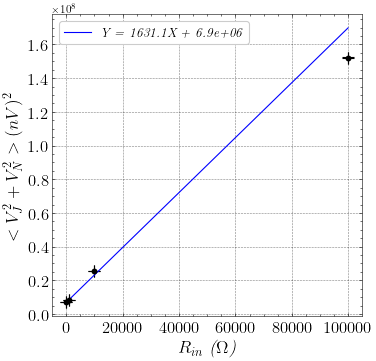

Corresponding p-value: 0.0
Degrees of freedom: 2


In [169]:
# PLOTTING OUR DATA ---------------------------------------
xdata, ydata, error_x, error_y = df2['Resistance  ($\Omega$)'], df2['Noise Variance (nV)^2'], 0, df2['NV_Uncert (nV)^2']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', '$R_{in}$  ($\Omega$)', '$<V_J^2 + V_N^2>  (nV)^2$', linear)
result

In [170]:
# Finding y-intercept <V_N^2 (t)> ---------------------------------------
y_intercept = result.params['b'].value
y_intercept_uncert = result.params['b'].stderr
y_intercept, y_intercept_uncert

(6872786.129159695, 568088.3602610474)

In [171]:
# Calculating Johnson Noise
df2['Johnson Noise (nV)^2'] = df2['Noise Variance (nV)^2'] - y_intercept
df2['Uncert Johnson Noise (nV)^2'] = np.sqrt(df2['NV_Uncert (nV)^2']**2 + y_intercept_uncert**2)
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$),Johnson Noise (nV)^2,Uncert Johnson Noise (nV)^2
2,6.862140e+06,4364.856674,100,-1.064621e+04,568105.128509
3,8.528437e+06,9086.783276,1000,1.655651e+06,568161.028842
4,2.550319e+07,15386.576251,10000,1.863040e+07,568296.693456
5,1.521523e+08,135340.426982,100000,1.452795e+08,583987.513770


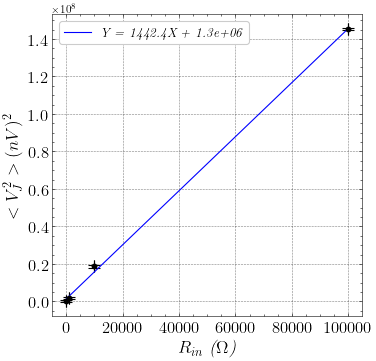

Corresponding p-value: 1.150631301349847e-08
Degrees of freedom: 2


In [172]:
#### PLOTTING OUR DATA ---------------------------------------
xdata, ydata, error_x, error_y = df2['Resistance  ($\Omega$)'], df2['Johnson Noise (nV)^2'], 0, df2['Uncert Johnson Noise (nV)^2']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', '$R_{in}$  ($\Omega$)', '$<V_J^2>  (nV)^2$', linear)
result

In [175]:
# Finding the Boltzmann constant
from scipy.constants import k

boltzmann = lambda params : params[0]/(params[1]*params[2]) # slope, T, ENBW

T, ENBW = 294.5, 99.9e3
slope = result.params['a'].value*1e-18
slope_error = result.params['a'].stderr*1e-18
kb = slope/(4*T*ENBW)
kb_uncert = uncertainty_var([slope, T, ENBW], [slope_error, 0, 0], boltzmann)

print(slope, slope_error)
print(kb, kb_uncert)

1.4424060702810408e-15 2.960567523443679e-17
1.2256790494068268e-23 1.0062923784374111e-24


In [176]:
# DETERMING THE %ERROR
error = abs((kb-k)/k)*100
print("Percentage error: ", error, "%")
exp_precision = 100*kb/kb_uncert
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Percentage error:  11.224427830185173 %
Experimental precision: 1218.014839096847 %
Sigmas: 0.00921534571656618


---
### Fourth try: dropping the first three low resistance datapoints
---

In [186]:
# GROUPING BY RESISTANCE ---------------------------------------
# Taking the average using weighted averages
resistances = [1,10,100,1000,10000,100000]
data_final = []
for resistance in resistances:
    df_temporal = df[df['Resistance  ($\Omega$)']==resistance]
    avg = weighted_avgs(df_temporal['Noise Variance (nV)^2'], df_temporal['NV_Uncert (nV)^2'])
    data_final.append([avg[0], avg[1], resistance])
df2 = pd.DataFrame(data_final, columns=['Noise Variance (nV)^2', 'NV_Uncert (nV)^2', 'Resistance  ($\Omega$)'])
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$)
0,6.656516e+06,4364.856674,1
1,6.690947e+06,4364.856674,10
2,6.862140e+06,4364.856674,100
3,8.528437e+06,9086.783276,1000
4,2.550319e+07,15386.576251,10000
5,1.521523e+08,135340.426982,100000


In [187]:
# Dropping 2 lowest resistances:
df2.drop(df2.head(3).index,inplace=True)
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$)
3,8.528437e+06,9086.783276,1000
4,2.550319e+07,15386.576251,10000
5,1.521523e+08,135340.426982,100000


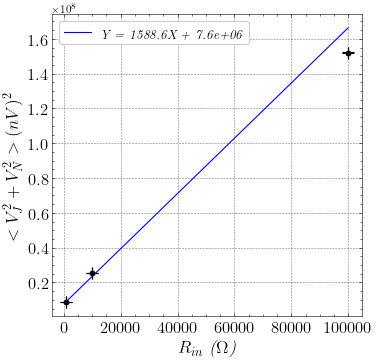

Corresponding p-value: 0.0
Degrees of freedom: 1


In [188]:
# PLOTTING OUR DATA ---------------------------------------
xdata, ydata, error_x, error_y = df2['Resistance  ($\Omega$)'], df2['Noise Variance (nV)^2'], 0, df2['NV_Uncert (nV)^2']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', '$R_{in}$  ($\Omega$)', '$<V_J^2 + V_N^2>  (nV)^2$', linear)
result

In [189]:
# Finding y-intercept <V_N^2 (t)> ---------------------------------------
y_intercept = result.params['b'].value
y_intercept_uncert = result.params['b'].stderr
y_intercept, y_intercept_uncert

(7584234.947494586, 1624839.7282558638)

In [190]:
# Calculating Johnson Noise
df2['Johnson Noise (nV)^2'] = df2['Noise Variance (nV)^2'] - y_intercept
df2['Uncert Johnson Noise (nV)^2'] = np.sqrt(df2['NV_Uncert (nV)^2']**2 + y_intercept_uncert**2)
df2

,Noise Variance (nV)^2,NV_Uncert (nV)^2,Resistance ($\Omega$),Johnson Noise (nV)^2,Uncert Johnson Noise (nV)^2
3,8.528437e+06,9086.783276,1000,9.442018e+05,1.624865e+06
4,2.550319e+07,15386.576251,10000,1.791896e+07,1.624913e+06
5,1.521523e+08,135340.426982,100000,1.445681e+08,1.630467e+06


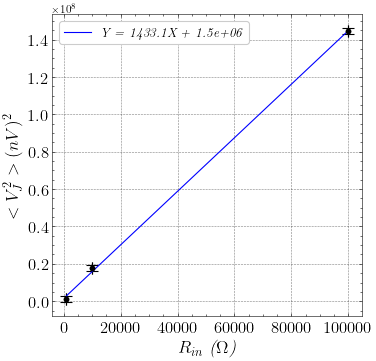

Corresponding p-value: 0.07505332086200611
Degrees of freedom: 1


In [191]:
#### PLOTTING OUR DATA ---------------------------------------
xdata, ydata, error_x, error_y = df2['Resistance  ($\Omega$)'], df2['Johnson Noise (nV)^2'], 0, df2['Uncert Johnson Noise (nV)^2']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', '$R_{in}$  ($\Omega$)', '$<V_J^2>  (nV)^2$', linear)
result

In [184]:
# Finding the Boltzmann constant
from scipy.constants import k

boltzmann = lambda params : params[0]/(params[1]*params[2]) # slope, T, ENBW

T, ENBW = 294.5, 99.9e3
slope = result.params['a'].value*1e-18
slope_error = result.params['a'].stderr*1e-18
kb = slope/(4*T*ENBW)
kb_uncert = uncertainty_var([slope, T, ENBW], [slope_error, 0, 0], boltzmann)

print(slope, slope_error)
print(kb, kb_uncert)

1.433112178181304e-15 3.744598229697248e-17
1.2177816000901614e-23 1.27278321774992e-24


In [192]:
# DETERMING THE %ERROR
error = abs((kb-k)/k)*100
print("Percentage error: ", error, "%")
exp_precision = 100*kb/kb_uncert
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Percentage error:  11.796437755710445 %
Experimental precision: 956.786342801571 %
Sigmas: 0.012329228823615139
